<a href="https://colab.research.google.com/github/Guillermina0406/Data-analysis-with-Python/blob/main/Final_Project_House_Sales_in_King_County%2C_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 🗂️ Dataset Description – House Sales in King County, USA

| Variable         | Description |
|------------------|-------------|
| **Id**              | Unique ID for each home sold |
| **Date**            | Date of the home sale |
| **Price**           | Price of each home sold (**target variable**) |
| **Bedrooms**        | Number of bedrooms |
| **Bathrooms**       | Number of bathrooms (where .5 represents a toilet without shower) |
| **Sqft_living**     | Square footage of the apartment's interior living space |
| **Sqft_lot**        | Square footage of the land space |
| **Floors**          | Number of floors |
| **Waterfront**      | Dummy variable: 1 if the property overlooks the waterfront, 0 otherwise |
| **View**            | Index from 0 to 4 rating the quality of the view |
| **Condition**       | Index from 1 to 5 rating the condition of the property |
| **Grade**           | Index from 1 to 13 rating construction and design quality (1–3: poor, 7: average, 11–13: high quality) |
| **Sqft_above**      | Interior square footage above ground level |
| **Sqft_basement**   | Interior square footage below ground level (basement) |
| **Yr_built**        | Year the house was originally built |
| **Yr_renovated**    | Year of the house’s last renovation (0 if never renovated) |
| **Zipcode**         | Zip code of the property's location |
| **Lat**             | Latitude coordinate |
| **Long**            | Longitude coordinate |
| **Sqft_living15**   | Average living space (in sqft) of the 15 nearest neighbors |
| **Sqft_lot15**      | Average lot size (in sqft) of the 15 nearest neighbors |


In [ ]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [ ]:
# prompt: descargar el csv a la compu

from google.colab import files
import pandas as pd

filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath)
df.to_csv('kc_house_data_NaN.csv', encoding = 'utf-8-sig')

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64


In [ ]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
print(df.isnull().sum())

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64


In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [ ]:
mean = df['bedrooms'].mean()
df['bedrooms'] = df['bedrooms'].replace(np.nan, mean)

In [ ]:
mean=df['bathrooms'].mean()
df['bathrooms']=df['bathrooms'].replace(np.nan,mean)

In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [ ]:
# Count the number of houses with unique floor values
floors_counts = df['floors'].value_counts().to_frame()

# Display the resulting DataFrame
floors_counts

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='waterfront', ylabel='price'>

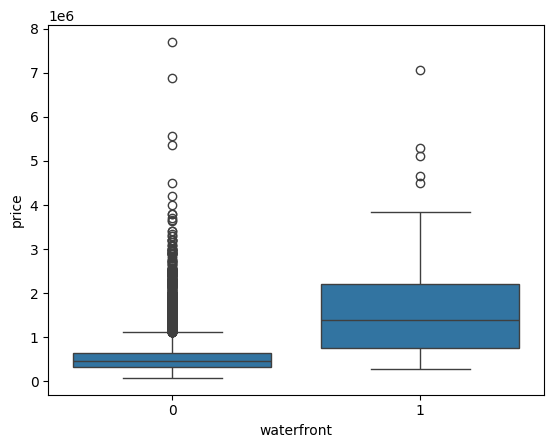

In [ ]:
sns.boxplot(x="waterfront", y="price", data=df)

(0.0, 8081250.0)

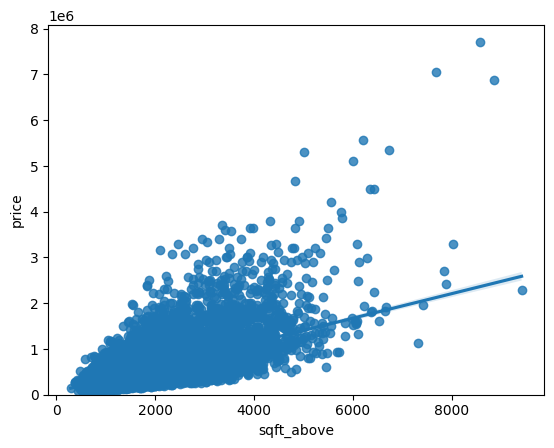

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.regplot(x='sqft_above', y='price', data=df)
plt.ylim(0,)

In [ ]:
df['price'].dtypes

dtype('float64')

## Visualize numerical distributions

### Subtask:
Generate histograms or density plots for numerical variables.


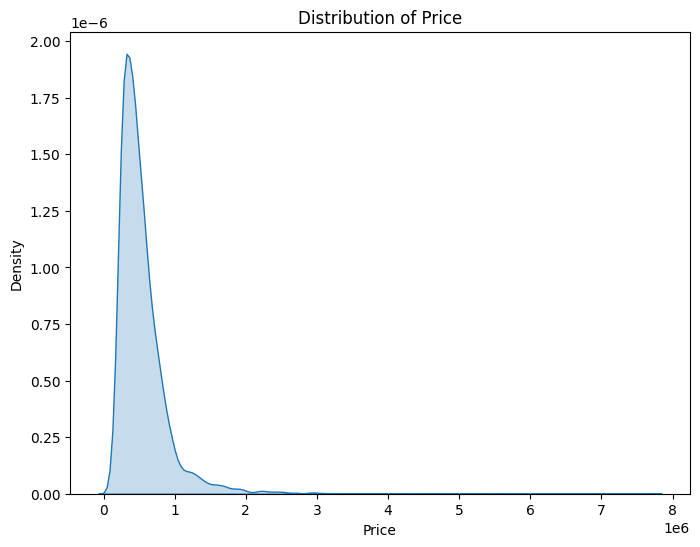

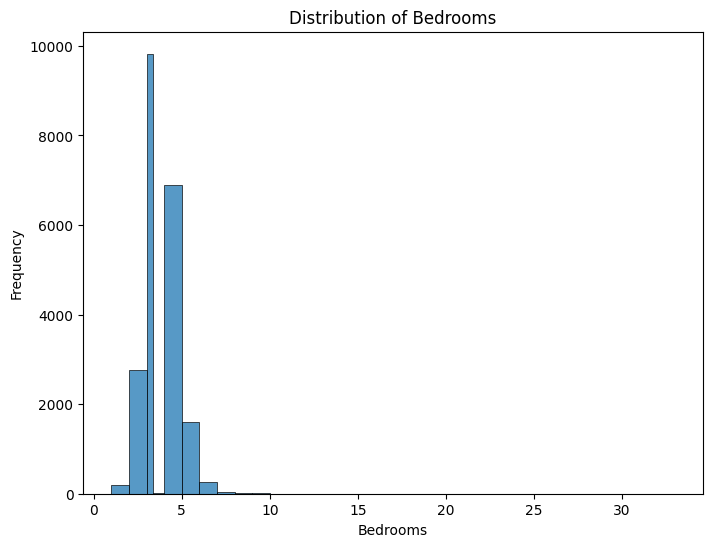

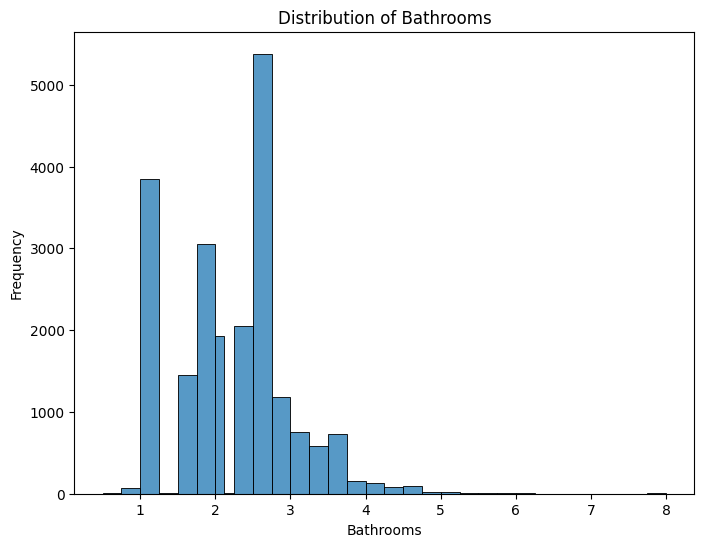

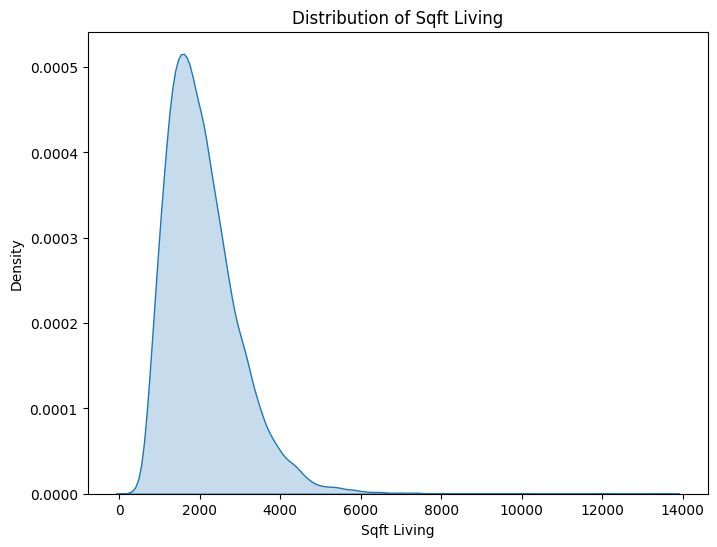

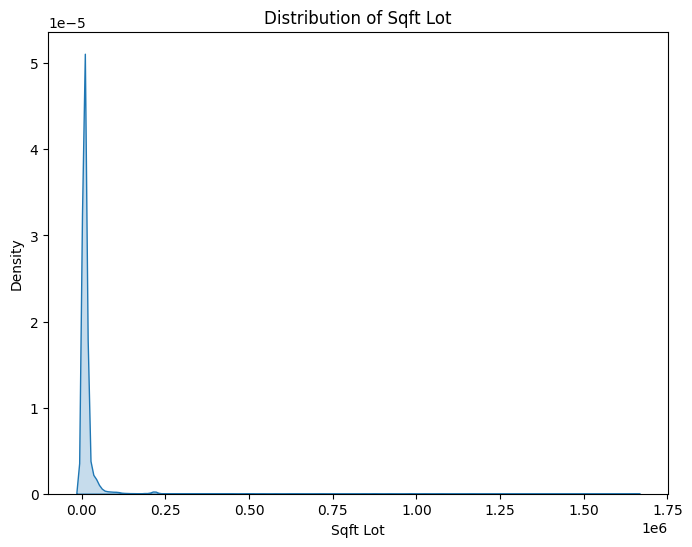

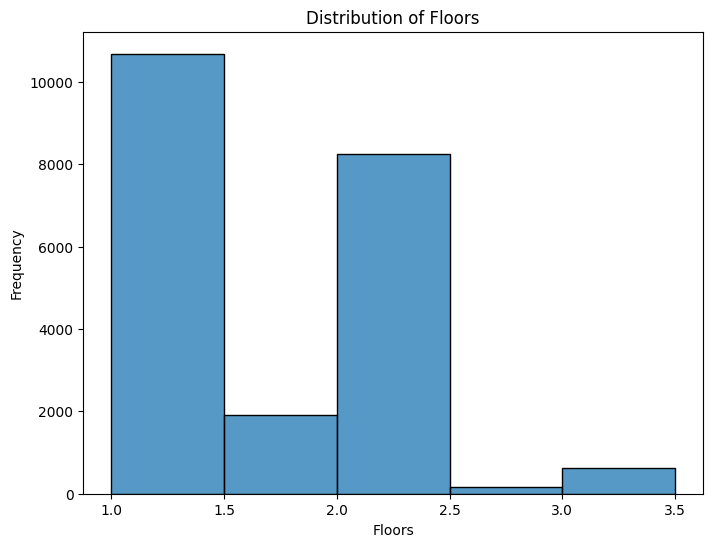

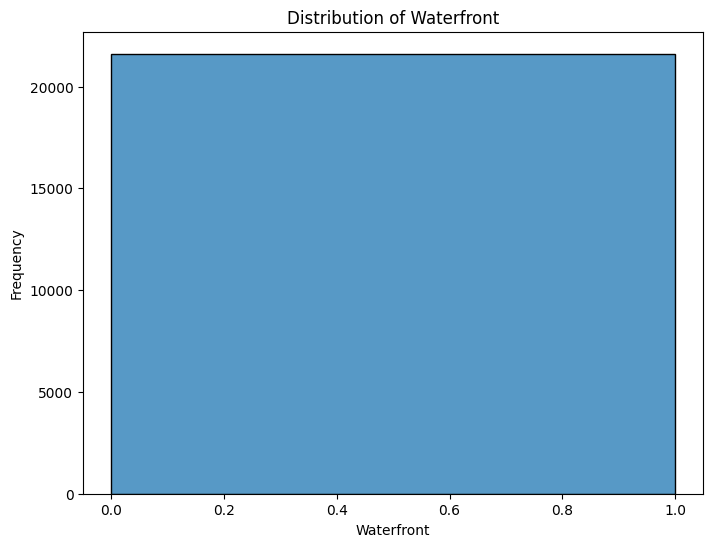

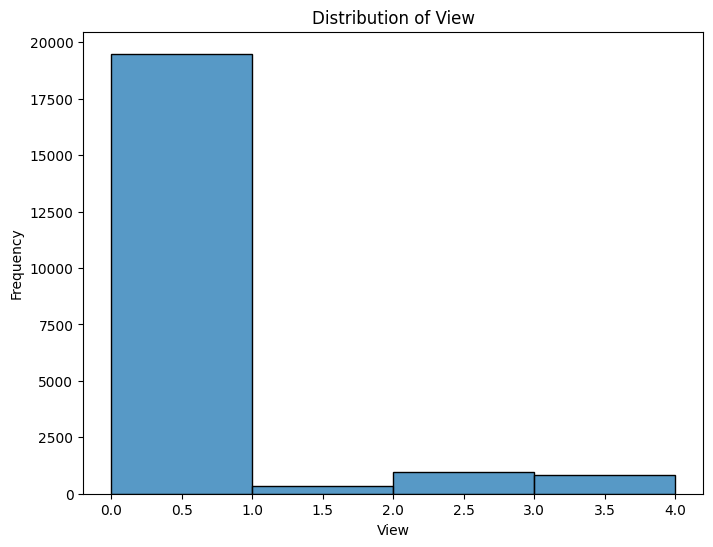

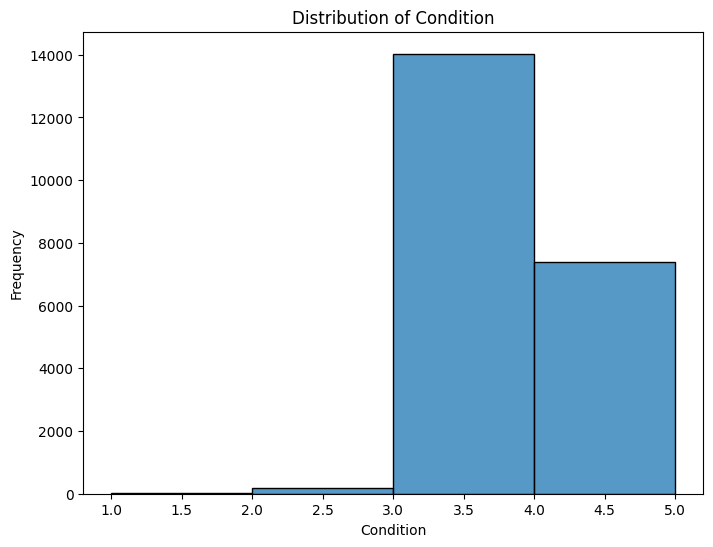

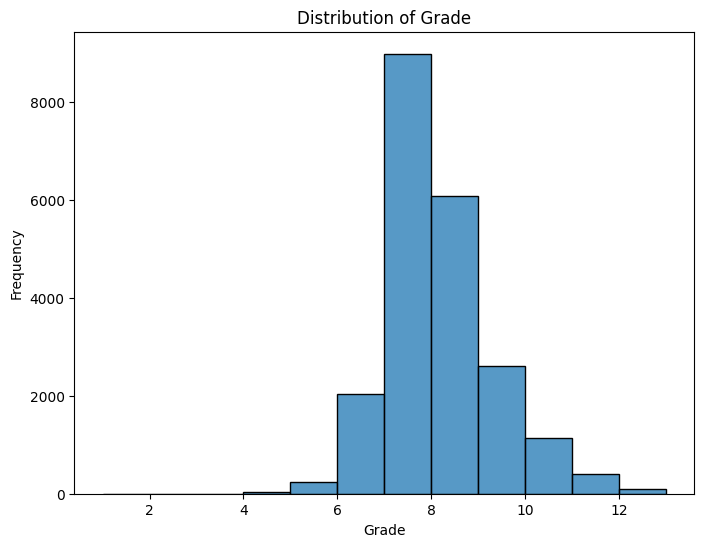

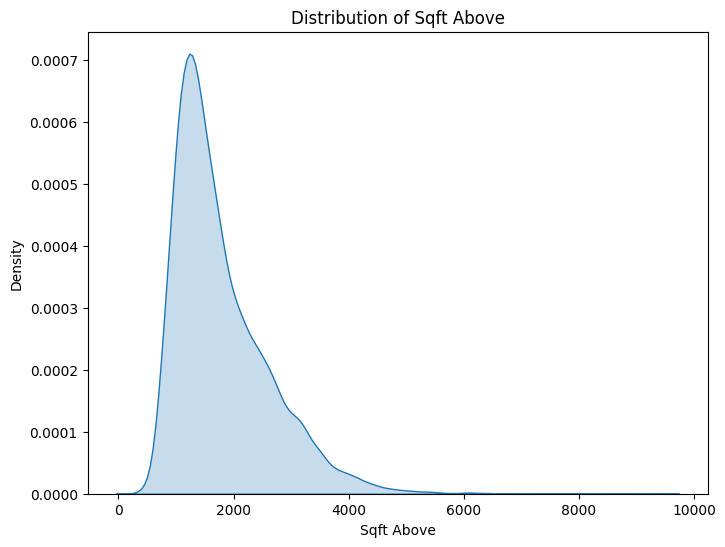

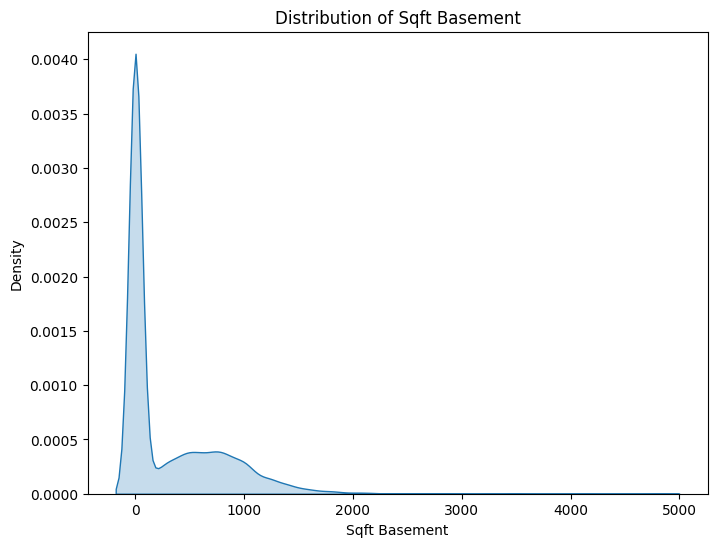

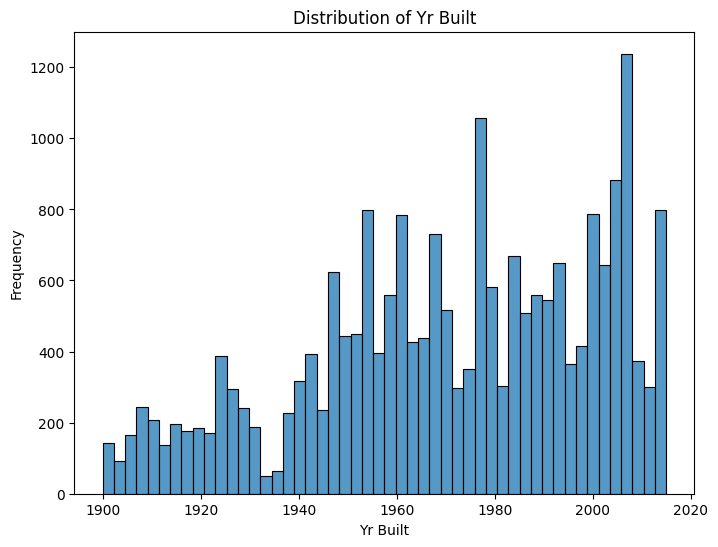

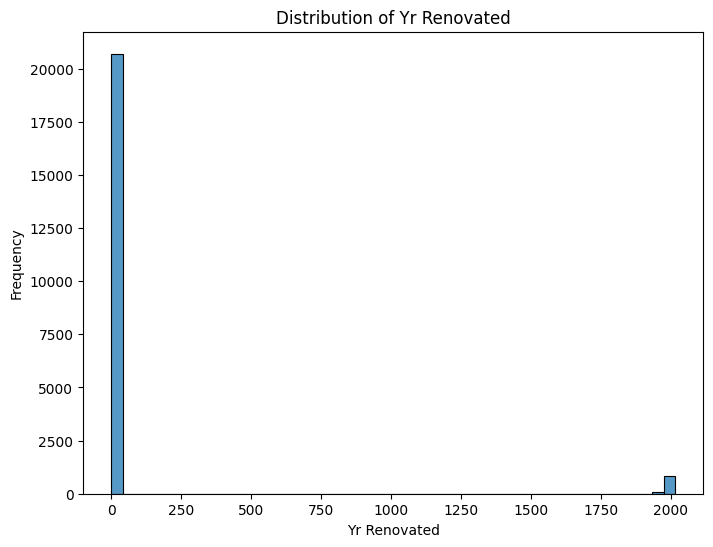

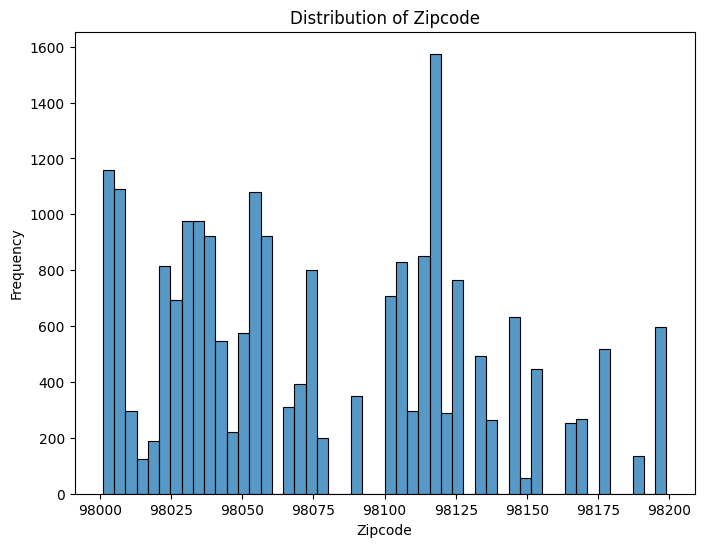

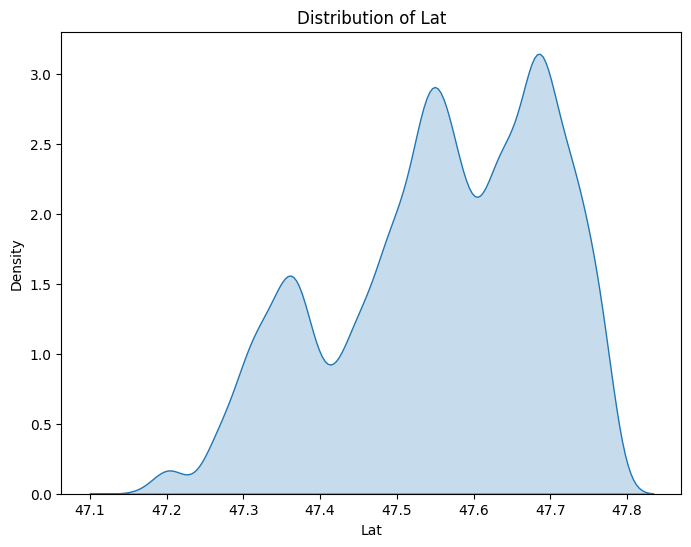

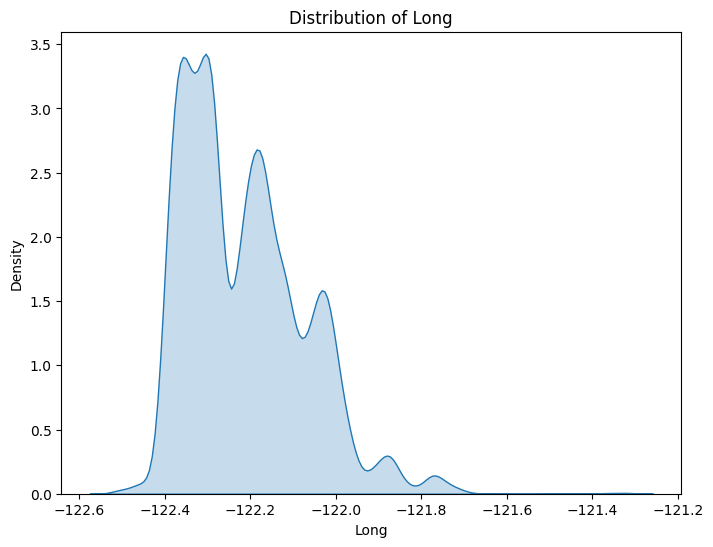

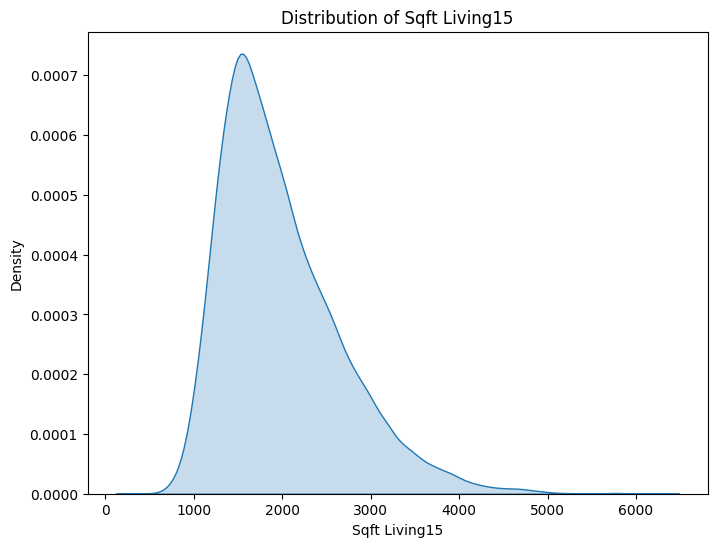

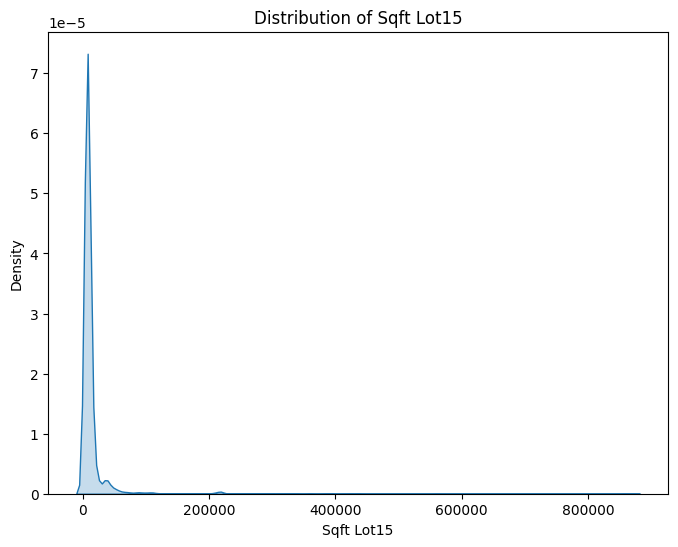

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    if col in ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']:
        # These can be treated as discrete/ordinal, a histogram is suitable
        sns.histplot(data=df, x=col, kde=False, bins=sorted(df[col].unique()))
        plt.title(f'Distribution of {col.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel("Frequency")
    elif col in ['zipcode', 'yr_built', 'yr_renovated']:
        # For year and zipcode, a histogram is also suitable
        sns.histplot(data=df, x=col, kde=False, bins=50) # Adjust bin count as needed
        plt.title(f'Distribution of {col.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel("Frequency")
    else:
        # For other numerical columns, a density plot might show the distribution shape better
        sns.kdeplot(data=df, x=col, fill=True)
        plt.title(f'Distribution of {col.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel("Density")
    plt.show()

In [ ]:
df_sinfecha=df.drop(['date'], axis=1) # Drop 'date' column
df_sinfecha.corr()['price'].sort_values()

,price
zipcode,-0.053203
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369
lat,0.307003


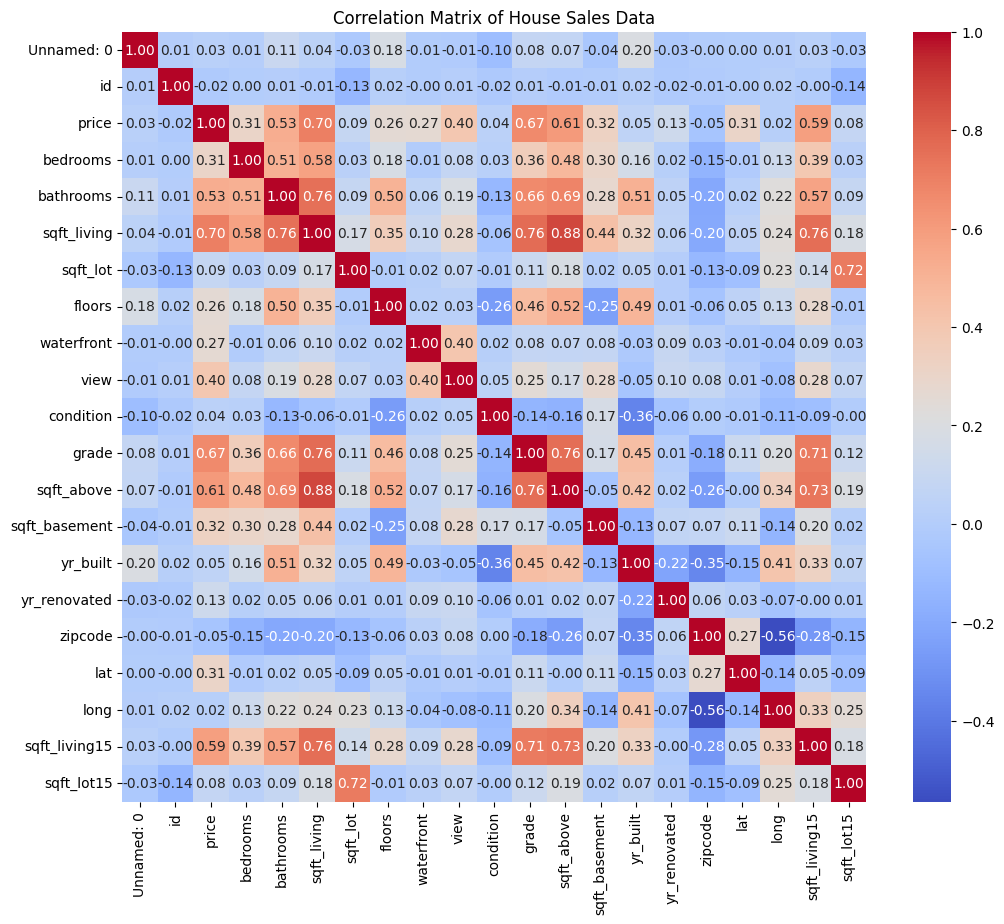

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of House Sales Data')
plt.show()

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)
# El método lm.score(X, Y) en un modelo de regresión lineal de sklearn devuelve el coeficiente de determinación R² (R cuadrado) del modelo entrenado.
# Es una métrica que indica qué proporción de la variabilidad de la variable dependiente (Y) se puede explicar por las variables independientes (X) en el modelo.

0.65769516660375

In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

¿Qué hace cada paso?

('scale', StandardScaler())

Escala los datos para que cada feature tenga media 0 y desviación estándar 1.
Esto es útil para mejorar el rendimiento de muchos modelos, especialmente cuando las variables tienen diferentes escalas.

('polynomial', PolynomialFeatures(include_bias=False))

Genera nuevas variables a partir de las originales, combinándolas mediante términos polinómicos.
Por ejemplo, si tenés dos variables x1 y x2, genera:
x1, x2, x1^2, x2^2, x1*x2, etc.

('model', LinearRegression())

Entrena un modelo de regresión lineal con las variables generadas por los pasos anteriores.

In [ ]:
# Define the features
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

# Create the pipeline object
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)

# Fit the pipeline using the features and target variable
pipe.fit(X,Y)

# Calculate the R^2 score
r_squared = pipe.score(X, Y)
print("R^2:", r_squared)

R^2: 0.7513408515988734


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [ ]:
from sklearn.linear_model import Ridge
# Create and fit a Ridge regression object
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)

# Calculate the R^2 using the test data
r_squared_ridge = RidgeModel.score(x_test, y_test)
print("R^2 for Ridge Regression:", r_squared_ridge)

R^2 for Ridge Regression: 0.6478759163939113


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, y_test are defined from the previous code

# Perform a second order polynomial transform
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

# Create and fit a Ridge regression object
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)

# Calculate the R^2 using the test data
r_squared_ridge = RidgeModel.score(x_test_pr, y_test)
print("R^2 for Ridge Regression with Polynomial Features:", r_squared_ridge)

R^2 for Ridge Regression with Polynomial Features: 0.7002744273539743


Feature Importance (Coefficients):
lat              672993.098328
waterfront       602002.522653
grade             82007.227679
view              67082.447190
sqft_living         129.355789
sqft_above           64.941287
sqft_basement        64.414503
sqft_living15         4.442931
bathrooms         -3224.167574
bedrooms         -25967.442999
floors           -29279.079303
dtype: float64


# Task
Visualize the distribution of each variable in the dataset.

## Identify variable types

### Subtask:
Determine which columns are numerical and which are categorical or discrete.


**Reasoning**:
Examine the data types and descriptive statistics to categorize columns into numerical and categorical/discrete for visualization purposes.



In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']

print("Numerical Columns:")
print(numerical_cols)
print("\nCategorical/Discrete Columns:")
print(categorical_cols)

Numerical Columns:
['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Categorical/Discrete Columns:
['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']


**Reasoning**:
Iterate through the numerical columns and generate a histogram or density plot for each to visualize its distribution.



## Visualize categorical/discrete distributions

### Subtask:
Generate bar plots or count plots for categorical or discrete variables.


**Reasoning**:
Iterate through the categorical columns and generate a count plot for each to visualize their distribution.



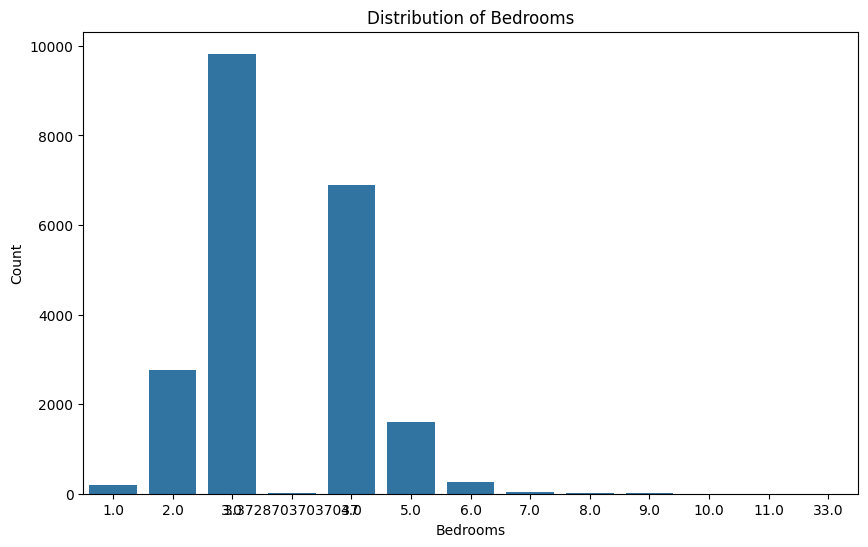

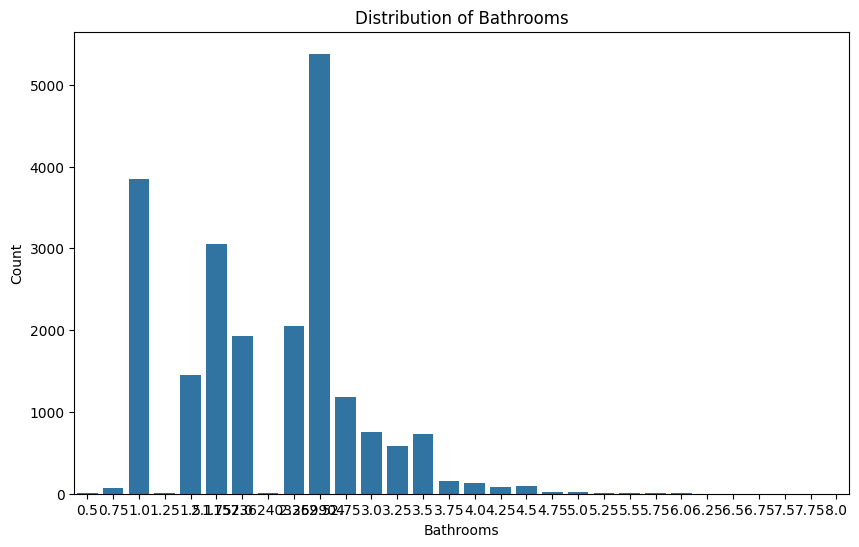

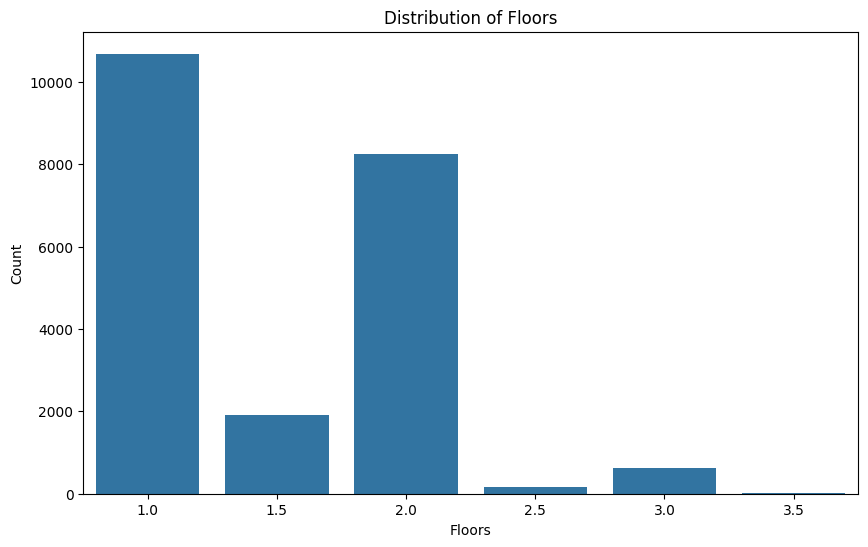

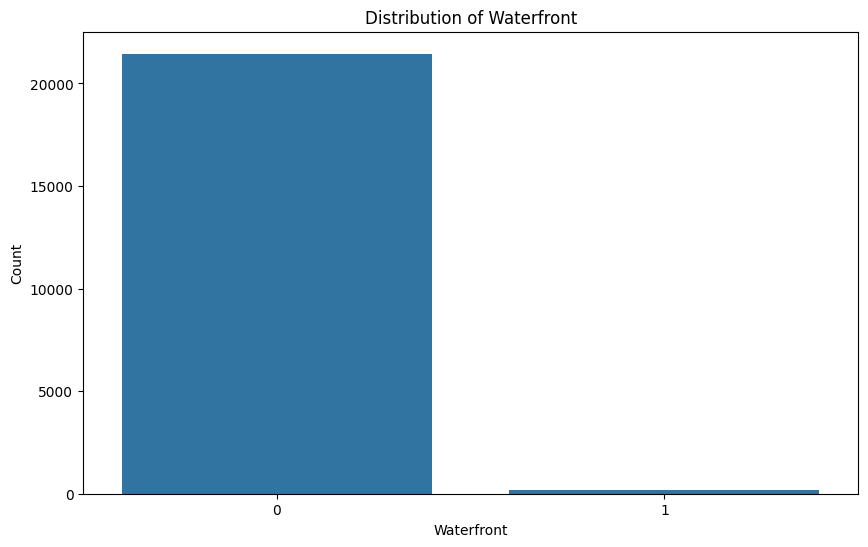

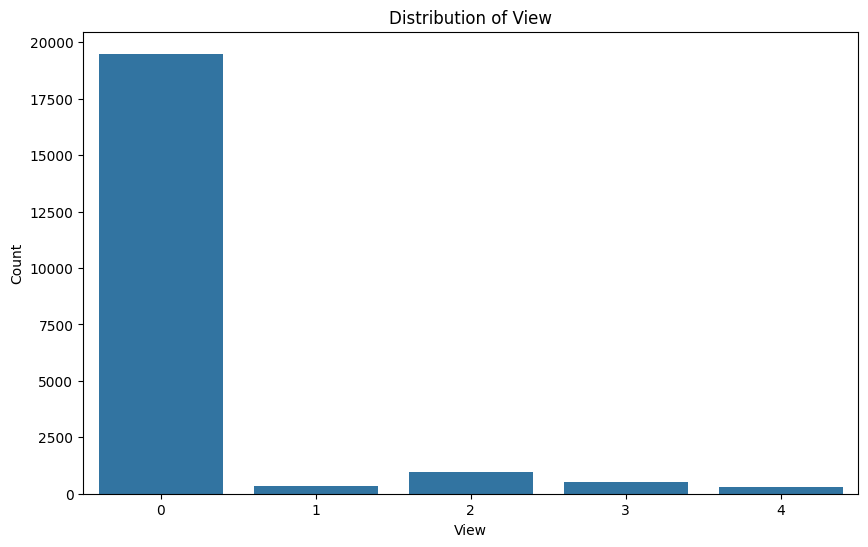

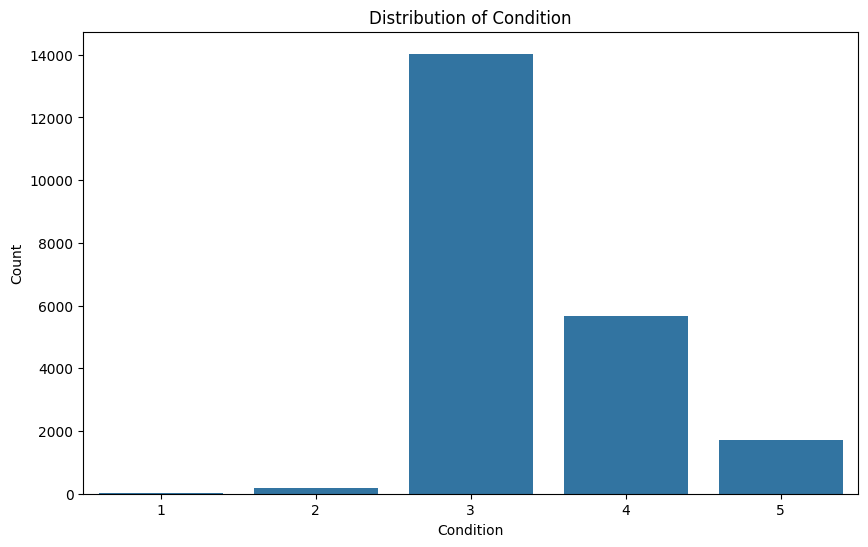

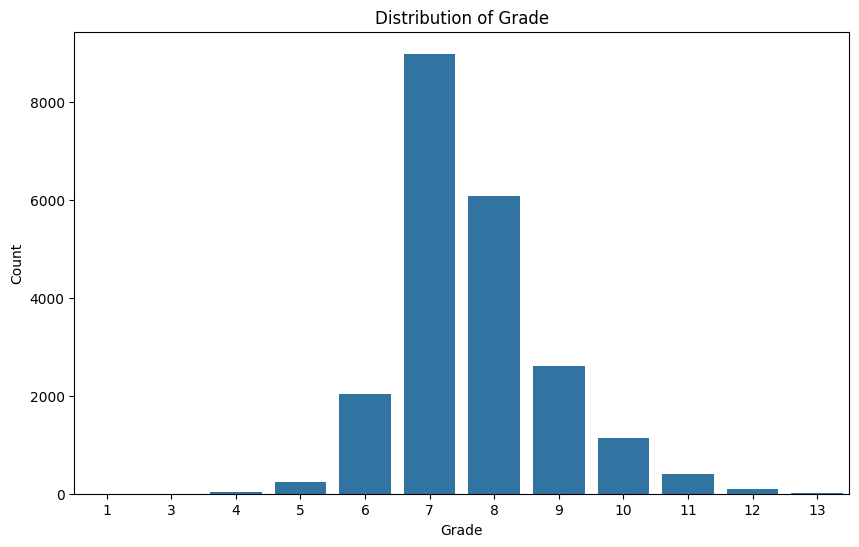

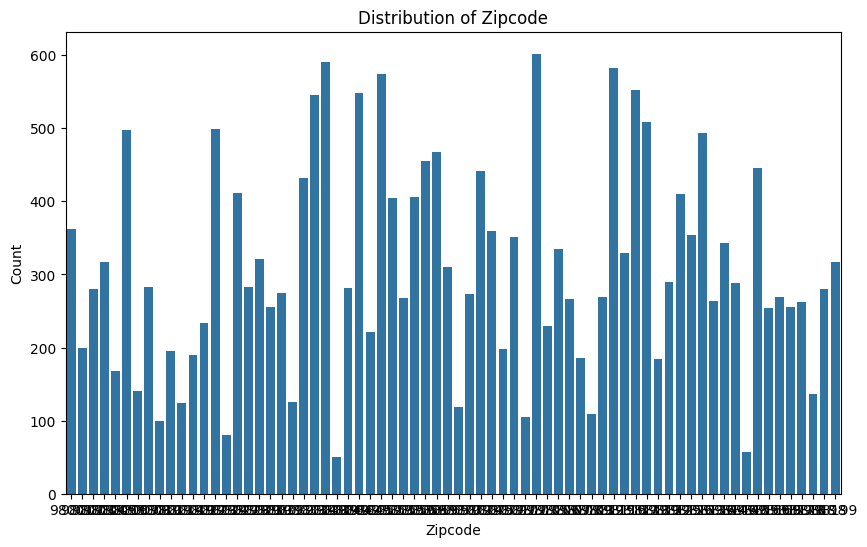

In [ ]:
categorical_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel("Count")
    plt.show()

## Present the visualizations

### Subtask:
Display the generated plots.


## Summary:

### Data Analysis Key Findings

*   The dataset contains both numerical and categorical/discrete variables.
*   Numerical columns include `price`, `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement`, `yr_built`, `yr_renovated`, `lat`, `long`, `sqft_living15`, and `sqft_lot15`.
*   Several columns (`bedrooms`, `bathrooms`, `floors`, `waterfront`, `view`, `condition`, `grade`, `zipcode`) were identified as suitable for treatment as categorical or discrete variables despite being numerically represented.
*   Histograms or density plots were used to visualize the distribution of numerical variables, with different plot types chosen based on the variable's nature (e.g., histograms for years and discrete/ordinal numerical data, density plots for continuous numerical data).
*   Count plots were generated to visualize the distribution of categorical/discrete variables, showing the frequency of each category.

### Insights or Next Steps

*   The visualizations provide a foundational understanding of the distribution and potential variability within each feature, which is crucial for subsequent data cleaning, feature engineering, and model selection steps.
*   Further analysis of the distributions might reveal outliers, skewed data, or imbalances in categorical features that could require specific preprocessing techniques.


# Task
Build and evaluate a Random Forest regression model on the dataset.

## Import necessary libraries

### Subtask:
Import `RandomForestRegressor` from `sklearn.ensemble`.


**Reasoning**:
Import the `RandomForestRegressor` class from the `sklearn.ensemble` module to prepare for building the Random Forest regression model.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

## Split data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using the specified features and target variable.



In [ ]:
from sklearn.model_selection import train_test_split

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 4323
number of training samples: 17290


## Create and fit the model

### Subtask:
Initialize and train a `RandomForestRegressor` model.


**Reasoning**:
Initialize a RandomForestRegressor model and train it with the training data.



In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate the model

### Subtask:
Calculate and print the R-squared score of the model on the test data.


**Reasoning**:
Calculate and print the R-squared score of the fitted Random Forest model on the test data.



In [ ]:
r_squared_rf = rf_model.score(x_test, y_test)
print("R-squared score on test data:", r_squared_rf)

R-squared score on test data: 0.7822301618605665


## Summary:

### Data Analysis Key Findings

* The dataset was split into training (17290 samples) and testing (4323 samples) sets, with 20% of the data allocated for testing.
* A `RandomForestRegressor` model was initialized with a `random_state` of 42 and trained on the training data.
* The R-squared score of the trained Random Forest model on the test data is approximately 0.7822.

### Insights or Next Steps

* The Random Forest model explains about 78.22% of the variance in the test data's target variable.
* Further steps could involve hyperparameter tuning of the `RandomForestRegressor` to potentially improve the model's performance.


In [ ]:
nueva_casa = {
    'floors': 1,
    'waterfront': 0,
    'lat': 47.65,
    'bedrooms': 3,
    'sqft_basement': 0,
    'view': 0,
    'bathrooms': 2,
    'sqft_living15': 1600,
    'sqft_above': 1800,
    'grade': 7,
    'sqft_living': 1800,
}

In [ ]:
import pandas as pd

nueva_casa_df = pd.DataFrame([nueva_casa])
precio_estimado = rf_model.predict(nueva_casa_df)
print(f'Precio estimado: ${precio_estimado[0]:,.2f}')


Precio estimado: $481,098.00


# Task
Train an XGBoost model on the dataset and evaluate its performance.

## Import necessary libraries

### Subtask:
Import `xgboost` and other required libraries.


**Reasoning**:
Import the XGBoostRegressor class to build the XGBoost model.



In [ ]:
from xgboost import XGBRegressor

## Split data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using the specified features and target variable, and print the number of samples in each set.



In [ ]:
from sklearn.model_selection import train_test_split

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 4323
number of training samples: 17290


## Create and fit the model

### Subtask:
Initialize and train an `XGBoostRegressor` model.


**Reasoning**:
Initialize and train an XGBoostRegressor model.



In [ ]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Evaluate the model

### Subtask:
Calculate and print the R-squared score of the model on the test data.


**Reasoning**:
Calculate and print the R-squared score of the fitted XGBoost model on the test data.



In [ ]:
r_squared_xgb = xgb_model.score(x_test, y_test)
print("R-squared score on test data:", r_squared_xgb)

R-squared score on test data: 0.7121918736564794


## Summary:

### Data Analysis Key Findings
* The XGBoost model was trained on a dataset with 17,290 training samples and evaluated on 4,323 test samples.
* The model achieved an R-squared score of approximately 0.712 on the test data.

### Insights or Next Steps
* To potentially improve the model's performance, further hyperparameter tuning of the XGBoost model could be explored.
* Investigating feature importance could provide insights into which features are most influential in predicting the target variable, which may guide future feature engineering efforts.
